# Lunar Lander OpenAI gym environment

Check out the [Open AI Gym documentation](https://www.gymlibrary.dev/environments/box2d/lunar_lander/) for a full description of the environment.

## Action Space

The agent has four discrete actions available:

* Do nothing = 0
* Fire right engine = 1
* Fire main engine = 2
* Fire left engine = 3

## Observation Space

The agent's observation space consists of a state vector with 8 variables:

* Its $(x,y)$ coordinates. The landing pad is always at coordinates $(0,0)$.
* Its linear velocities $(\dot x,\dot y)$.
* Its angle $\theta$.
* Its angular velocity $\dot \theta$.
* Two booleans, $l$ and $r$, that represent whether each leg is in contact with the ground or not.

## Rewards

After every step, a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each step, the reward:
- is increased/decreased the closer/further the lander is to the landing pad.
- is increased/decreased the slower/faster the lander is moving.
- is decreased the more the lander is tilted (angle not horizontal).
- is increased by 10 points for each leg that is in contact with the ground.
- is decreased by 0.03 points each frame a side engine is firing.
- is decreased by 0.3 points each frame the main engine is firing.

The episode receives an additional reward of -100 or +100 points for crashing or landing safely respectively.

## Episode Termination

An episode ends (i.e the environment enters a terminal state) if:

* The lunar lander crashes (i.e if the body of the lunar lander comes in contact with the surface of the moon).

* The absolute value of the lander's $x$-coordinate is greater than 1 (i.e. it goes beyond the left or right border)

# env setup

Finally got the gym environment to run on colab with the help of this [post](https://stackoverflow.com/questions/76222239/pip-install-gymnasiumbox2d-not-working-on-google-colab) after searching everywhere for some solution.

In [1]:
!pip install swig --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.5 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d] --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
# import gymnasium as gym
import gym
from PIL import Image

In [4]:
# # Ignore all warnings
# import warnings
# warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
env = gym.make(
    "LunarLander-v2",
    continuous = False,
    gravity = -10.0,
    enable_wind = False,
    wind_power = 15.0,
    turbulence_power = 1.5,
)
env.reset(seed=0)

state_shape = env.observation_space.shape
num_actions = env.action_space.n
print('State shape: ', state_shape)
print('Number of actions: ', num_actions)

State shape:  (8,)
Number of actions:  4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


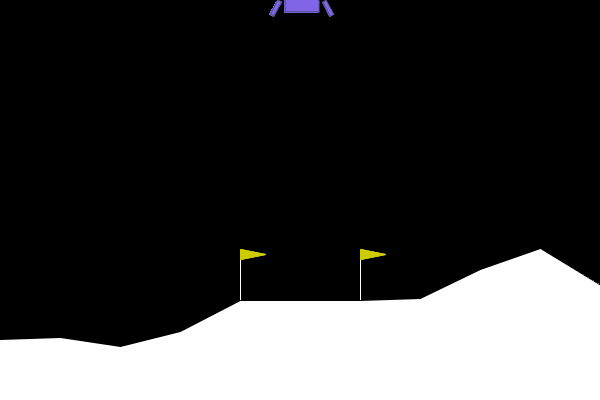

In [6]:
Image.fromarray(env.render(mode='rgb_array'))

# Find some way to render the game

This took way too long than I would have expected. This all has to do with finding a work-around for the rendering of the environment, because env.render() caused me too many issues to count, as I wanted to use google colab.

Finally stuck with [this solution](https://stackoverflow.com/questions/60765613/how-to-show-episode-in-rendered-openai-gym-environment) from from stackoverflow.


In [7]:
import os
import imageio
import numpy as np
from PIL import Image
import PIL.ImageDraw as ImageDraw
import matplotlib as mpl
from matplotlib import pyplot as plt
from moviepy.editor import VideoFileClip
nb_dir = os.path.abspath('')

  np.bool8: (False, True),

  from scipy.ndimage.filters import sobel



In [8]:
def _label_with_episode_number(frame, episode_num):
  im = Image.fromarray(frame)
  drawer = ImageDraw.Draw(im)
  if np.mean(im) < 128:
    text_color = (255,255,255)
  else:
    text_color = (0,0,0)
  drawer.text((im.size[0]/20,im.size[1]/18), f'Episode: {episode_num+1}', fill=text_color)
  return im

def save_gif(frames_list, gif_file_name, frames_per_second=30):
  imageio.mimwrite(gif_file_name, frames, fps=frames_per_second)

def gif_to_mp4(gif_file_name, mp4_file_name, playback_speed):
  # Convert the saved gif to a .mp4 video format
  gif_path = os.path.join(nb_dir, gif_file_name)
  clip = VideoFileClip(gif_path)
  adjusted_clip = clip.speedx(factor=playback_speed)
  mp4_path = os.path.join(nb_dir, mp4_file_name)
  adjusted_clip.write_videofile(mp4_path)

def download_gameplay_video(frames_list, mp4_file_name, frames_per_second=30, playback_speed=1):
  gif_file_name = mp4_file_name[:-4] + '.gif'
  save_gif(frames_list, gif_file_name, frames_per_second)
  gif_to_mp4(gif_file_name, mp4_file_name, playback_speed)
  # Download the video file into your local system to view it
  from google.colab import files
  mp4_path = os.path.join(nb_dir, mp4_file_name)
  files.download(mp4_path)

  and should_run_async(code)



## Sample usage

Make sure that your code follows a similar structure to the cell below when you want to record the gameplay and view it later.

Don't run the cell below if you don't want to download the gameplay of the random agent. It's only meant to be for reference on how to use the functions in the cell above.

In [9]:
frames = []
num_episodes = 2 # number of times to play the game from the beginning, keep this low else it will eat up all the RAM of colab

for episode in range(num_episodes):
  state = env.reset()
  while True:
    # Make sure to do write these 2 lines of code in the appropriate position when you are training the model
    # (along with the frames = [] at the very beginning of the cell) :
    frame = env.render(mode='rgb_array')
    frames.append(_label_with_episode_number(frame, episode_num=episode))

    random_action = env.action_space.sample()
    state, _, done, _ = env.step(random_action)

    if done:
      break

file_name = 'Random Agent.mp4'
download_gameplay_video(frames_list=frames, mp4_file_name=file_name, frames_per_second=30, playback_speed=1)

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(

  if not isinstance(terminated, (bool, np.bool8)):

  warnings.warn(



Moviepy - Building video /content/Random Agent.mp4.
Moviepy - Writing video /content/Random Agent.mp4



Moviepy - Done !
Moviepy - video ready /content/Random Agent.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deep Q-Learning (DQN)

In cases where both the state and action space are discrete we can estimate the action-value function iteratively by using the Bellman equation:

$$
Q_{i+1}(s,a) = R + \gamma \max_{a'}Q_i(s',a')
$$

This iterative method converges to the optimal action-value function $Q^*(s,a)$ as $i\to\infty$. This means that the agent just needs to gradually explore the state-action space and keep updating the estimate of $Q(s,a)$ until it converges to the optimal action-value function $Q^*(s,a)$. However, in cases where the state space is continuous it becomes practically impossible to explore the entire state-action space. Consequently, this also makes it practically impossible to gradually estimate $Q(s,a)$ until it converges to $Q^*(s,a)$.

In the Deep $Q$-Learning, we solve this problem by using a neural network to estimate the action-value function $Q(s,a)\approx Q^*(s,a)$. We call this neural network a $Q$-Network and it can be trained by adjusting its weights at each iteration to minimize the mean-squared error in the Bellman equation.

Unfortunately, using neural networks in reinforcement learning to estimate action-value functions has proven to be highly unstable. Luckily, there's a couple of techniques that can be employed to avoid instabilities. These techniques consist of using a ***Target Network*** and ***Experience Replay***.

The purpose served by these 2 techniques, is also the explanation behind why just a single neural network fails.

## Target Netork

We can train the $Q$-Network by adjusting it's weights at each iteration to minimize the mean-squared error in the Bellman equation, where the target values are given by:

$$
y = R + \gamma \max_{a'}Q(s',a';w)
$$

where $w$ are the weights of the $Q$-Network. This means that we are adjusting the weights $w$ at each iteration to minimize the following error:

$$
\overbrace{\underbrace{R + \gamma \max_{a'}Q(s',a'; w)}_{\rm {y~target}} - Q(s,a;w)}^{\rm {Error}}
$$

Notice that this forms a problem because the $y$ target is changing on every iteration. Having a constantly moving target can lead to oscillations and instabilities. To avoid this, we can create
a separate neural network for generating the $y$ targets. We call this separate neural network the **target $\hat Q$-Network** and it will have the same architecture as the original $Q$-Network. By using the target $\hat Q$-Network, the above error becomes:

$$
\overbrace{\underbrace{R + \gamma \max_{a'}\hat{Q}(s',a'; w^-)}_{\rm {y~target}} - Q(s,a;w)}^{\rm {Error}}
$$

where $w^-$ and $w$ are the weights of the target $\hat Q$-Network and $Q$-Network, respectively.

## Soft Updates

In practice, we will use the following algorithm: every $C$ time steps we will use the $\hat Q$-Network to generate the $y$ targets and update the weights of the target $\hat Q$-Network using the weights of the $Q$-Network. We will update the weights $w^-$ of the the target $\hat Q$-Network using a **soft update**. This means that we will update the weights $w^-$ using the following rule:

$$
w^-\leftarrow \tau w + (1 - \tau) w^-
$$

where $\tau\ll 1$. By using the soft update, we are ensuring that the target values, $y$, change slowly, which greatly improves the stability of our learning algorithm.

## Experience Replay

When an agent interacts with the environment, the states, actions, and rewards the agent experiences are sequential by nature. If the agent tries to learn from these consecutive experiences it can run into problems due to the strong correlations between them. To avoid this, we employ a technique known as Experience Replay to generate uncorrelated experiences for training our agent.

Experience replay consists of storing the agent's experiences (i.e the states, actions, and rewards the agent receives) in a memory buffer and then sampling a random mini-batch of experiences from the buffer to do the learning. The experience tuples $(S_t, A_t, R_t, S_{t+1})$ will be added to the memory buffer at each time step as the agent interacts with the environment.

By using experience replay we avoid problematic correlations, oscillations and instabilities. In addition, experience replay also allows the agent to potentially use the same experience in multiple weight updates, which increases data efficiency.

For convenience, we will store the experiences as named tuples.

## Putting everything together

Now that we know all the techniques that we are going to use, we can put them together to arrive at the Deep Q-Learning Algorithm with a Target Network and an Experience Replay.

[DQN Algo](https://drive.google.com/file/d/1OhkSQAG6TU8-1svWzaZHfCn1LDN9FTA6/view?usp=sharing)

# Code

## Imports

In [10]:
from torch import nn
import torch
from collections import deque
import numpy as np
import random
from tqdm.notebook import tqdm
# Fixed seed for reproducibility of results
rs = 1234
torch.manual_seed(rs)
random.seed(rs)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# .to(device) --> on all tensors and models to speed up calculations by utilizing gpu
# if models are on gpu and tensors aren on cpu, then pytorch would give a RuntimeError about the same
print(device)

  and should_run_async(code)



cuda


## Hyperparameters

In [12]:
TARGET_UPDATE_FREQ = 4 # update the target Q network with the parameters of the Q network every this number of steps
TAU = 0.001 # soft update parameter
ALPHA = 0.001  # learning rate for the optimizer
GAMMA = 0.995  # discount rate

# Replay buffer parameters:
BATCH_SIZE = 64 # number of experiences we will sample from the replay buffer, for training
BUFFER_SIZE = 50_000 # maximum number of experiences we will store in the replay buffer before overwriting old experiences
MIN_BUFFER_SIZE = 250 # how many experiences we want in the replay buffer before we want to start training by computing gradients

# Epsilon greedy policy for exploration vs exploitation by the agent (nn model) in the environment:
EPSILON_START = 1.0 # go from 100% random actions
EPSILON_END = 0.01 # to 1% random actions
EPSILON_DECAY_RATE = 0.02 # decay rate of Epsilon over the course of training

# Number of training episodes and logging frequency:
NUM_EPISODES = 2000 # number of games that we will run the training loop for
LOG_STEPS = 1000 # log the results of training every this many steps

## Make the Network class

In [13]:
class Network(nn.Module):
  def __init__(self, env):
    super().__init__()
    in_features = int(np.prod(env.observation_space.shape))
    self.net = nn.Sequential (
      nn.Linear(in_features, 128),
      nn.ReLU(),
      nn.Linear(128, env.action_space.n)
    )

  def forward(self, x):
    return self.net(x)

  def act(self, state):
    state_t = torch.as_tensor(state, dtype=torch.float32).to(device) # convert the state into a pytorch tensor data type
    q_values = self.forward(state_t.unsqueeze(0)) # get the q values for every single action that the agent can take
    # unsqueeze(0) for an extra dummy batch dimension = 1, as we are not using a batched environment
    max_q_index = torch.argmax(q_values, dim=1)[0]
    action = max_q_index.detach().item() # convert the pytorch tensor max_q_index into an integer which is the
    # action index in the action space that gives the greatest q value (according to this nn) among all the other actions
    return action

## Make the Q and Target Q Networks and an optimizer

In [14]:
q_net = Network(env).to(device)
target_q_net = Network(env).to(device)

# Initialize the weights of both the Q and the target Q networks with the same weights
target_q_net.load_state_dict(q_net.state_dict())
# Create an optimizer
optimizer = torch.optim.Adam(q_net.parameters(), lr=ALPHA)

In [15]:
# Ensure optimizer's state corresponds to the model's device
for state in optimizer.state.values():
  for k, v in state.items():
    if isinstance(v, torch.Tensor):
      state[k] = v.to(device)

  and should_run_async(code)



## Make a replay buffer and a reward buffer

In [16]:
replay_buffer = deque(maxlen=BUFFER_SIZE)
# Initialize replay buffer
state = env.reset()
for _ in range(MIN_BUFFER_SIZE):
  random_action = env.action_space.sample()
  new_state, reward, done, info = env.step(random_action)
  experience = (state, random_action, reward, done, new_state)
  replay_buffer.append(experience)
  state = new_state
  if done:
    state = env.reset()

# Make a reward buffer for storing the total cumulative reward in each episode upto the last 100 episodes
reward_buffer = deque([0.0], maxlen=100)

## Make a function to get the required values from the replay buffer as tuples

In [17]:
def get_sample_from_replay_buffer():
  experiences = random.sample(replay_buffer, BATCH_SIZE)
  # print(experiences[0])
  states_list = [e[0].tolist() for e in experiences]
  states_array = np.array(states_list)
  states_t = torch.as_tensor(states_array, dtype=torch.float32).to(device)
  # print(states_t[0])
  actions_list = [e[1] for e in experiences]
  actions_array = np.array(actions_list)
  actions_t = torch.as_tensor(actions_array, dtype=torch.int64).unsqueeze(-1).to(device)
  # print(actions_t[0])
  rewards_list = [e[2] for e in experiences]
  rewards_array = np.array(rewards_list)
  rewards_t = torch.as_tensor(rewards_array, dtype=torch.float32).unsqueeze(-1).to(device)
  # print(rewards_t[0])
  dones_list = [e[3] for e in experiences]
  dones_array = np.array(dones_list)
  dones_t = torch.as_tensor(dones_array, dtype=torch.float32).unsqueeze(-1).to(device)
  # print(dones_t[0])
  new_states_list = [e[4].tolist() for e in experiences]
  new_states_array = np.array(new_states_list)
  new_states_t = torch.as_tensor(new_states_array, dtype=torch.float32).to(device)
  # print(new_states_t[0])
  return states_t, actions_t, rewards_t, dones_t, new_states_t

## Epsilon Greedy Exploration with decay over time (episodes)

In [18]:
def decay_epsilon(episode):
  epsilon = EPSILON_END + (EPSILON_START - EPSILON_END) * np.exp(-(EPSILON_DECAY_RATE * episode)) # argument was episode and rate was 0.015
  # epsilon = EPSILON_DECAY_RATE * epsilon # argument was epsilon and rate was 0.995
  return max(epsilon, EPSILON_END)

## Train the agent

In [19]:
def train_DQN_Agent(Q_net_params_filepath):
  # flags for storing the parameters only once in every checkpoint
  saved_checkpoint_1 = True
  saved_checkpoint_2 = True
  saved_checkpoint_3 = True
  saved_checkpoint_4 = True

  # For plotting the results later
  episode_avg_reward_dict = {}

  step = 0

  # epsilon = EPSILON_START
  for episode in tqdm(range(NUM_EPISODES), desc='Training...', leave=True):
    episode_reward = 0.0
    state = env.reset()
    while True:
      epsilon = decay_epsilon(episode)
      random_sample = random.random()
      action = None
      if random_sample <= epsilon:
        action = env.action_space.sample()
      else:
        action = q_net.act(state)

      new_state, reward, done, info = env.step(action)
      experience = (state, action, reward, done, new_state)
      replay_buffer.append(experience)
      state = new_state

      episode_reward += reward

      if done:
        reward_buffer.append(episode_reward)
        break

      # Sample a batch of experiences from the replay_buffer to train the model
      states, actions, rewards, dones, new_states = get_sample_from_replay_buffer()

      # Compute targets
      target_q_values = target_q_net(new_states) # set of q values for each observation in the batch
      max_target_values = target_q_values.max(dim=1, keepdim=True)[0] # choose the max q value for each observation
      targets = rewards + GAMMA * (1 - dones) * max_target_values # if step is a terminal step then 2nd term would be 0
      # this is a short way to write the piece-wise definition of the targets

      # Compute loss
      q_values = q_net(states)
      action_q_values = torch.gather(input=q_values, dim=1, index=actions)
      # loss = nn.MSELoss(action_q_values, targets)
      loss = nn.functional.smooth_l1_loss(action_q_values, targets)

      # Gradient Descent
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Update target network
      if step % TARGET_UPDATE_FREQ == 0:
        for target_param, param in zip(target_q_net.parameters(), q_net.parameters()):
          target_param.data.copy_(TAU * param.data + (1.0 - TAU) * target_param.data)

      # Logging results and saving checkpoints in training
      if step % LOG_STEPS == 0 and step != 0:
        print('Step No:', step)
        print('Episode No:', episode)
        avg_reward = np.mean(reward_buffer)
        print('Avg reward over the last 100 episodes:', avg_reward)
        episode_avg_reward_dict[episode] = avg_reward
        print('Highest avg reward logged so far:', max(episode_avg_reward_dict.values()) )
        # Save the weights of the model once it reaches certain points so that we can play
        # the game using different models and see its gameplay in specific stages of its training
        if avg_reward  > 50 and saved_checkpoint_1:
          q_net_params_filepath = Q_net_params_filepath[:-4] + ' Checkpoint 1' + '.pth'
          torch.save(target_q_net.state_dict(), q_net_params_filepath)
          print(f"Agent parameters saved successfully to '{q_net_params_filepath}'")
          saved_checkpoint_1 = False
        if avg_reward > 150 and saved_checkpoint_2:
          q_net_params_filepath = Q_net_params_filepath[:-4] + ' Checkpoint 2' + '.pth'
          torch.save(target_q_net.state_dict(), q_net_params_filepath)
          print(f"Agent parameters saved successfully to '{q_net_params_filepath}'")
          saved_checkpoint_2 = False
        if avg_reward >= 200 and saved_checkpoint_3:
          q_net_params_filepath = Q_net_params_filepath[:-4] + ' Checkpoint 3' + '.pth'
          torch.save(target_q_net.state_dict(), q_net_params_filepath)
          print(f"Agent parameters saved successfully to '{q_net_params_filepath}'")
          saved_checkpoint_3 = False
        if avg_reward >= 230 and saved_checkpoint_4:
          q_net_params_filepath = Q_net_params_filepath[:-4] + ' Checkpoint 4' + '.pth'
          torch.save(target_q_net.state_dict(), q_net_params_filepath)
          print(f"Agent parameters saved successfully to '{q_net_params_filepath}'")
          saved_checkpoint_4 = False
          print()
          print(f"Environment solved successfully in {episode+1} episodes !")
          return episode_avg_reward_dict
        print()

      step += 1

  return episode_avg_reward_dict

In [ ]:
Q_net_params_filepath = os.path.join(nb_dir, 'Q net params.pth')

episode_avg_reward_dict = train_DQN_Agent(Q_net_params_filepath=Q_net_params_filepath)

Training...:   0%|          | 0/2000 [00:00<?, ?it/s]

Step No: 1000
Episode No: 11
Avg reward over the last 100 episodes: -110.31482118447451
Highest avg reward logged so far: -110.31482118447451

Step No: 2000
Episode No: 19
Avg reward over the last 100 episodes: -111.25365991719426
Highest avg reward logged so far: -110.31482118447451

Step No: 3000
Episode No: 20
Avg reward over the last 100 episodes: -113.19589460208512
Highest avg reward logged so far: -110.31482118447451

Step No: 4000
Episode No: 27
Avg reward over the last 100 episodes: -115.2194800888333
Highest avg reward logged so far: -110.31482118447451

Step No: 5000
Episode No: 29
Avg reward over the last 100 episodes: -107.0795588854228
Highest avg reward logged so far: -107.0795588854228

Step No: 6000
Episode No: 34
Avg reward over the last 100 episodes: -104.25734664173208
Highest avg reward logged so far: -104.25734664173208

Step No: 7000
Episode No: 39
Avg reward over the last 100 episodes: -106.27673564891693
Highest avg reward logged so far: -104.25734664173208

St

## Run below cell if you force stopped the training (above) cell's execution
After force stopping the previous cell's execution if required (reward logs had no improvement over a long period), save the latest training state of the q_net parameters as a checkpoint.

This was required because I set the last checkpoint's reward value too high as I was not sure what the max reward was, ik it was written 200 in documentation but my model kept wasting fuel even after landing properly, so I wanted to get a smarter model with a higher reward. Through this I found 239 as the highest possible avg reward, so later I set the checkpoint 4 threshold as 230.

In [ ]:
q_net_params_filepath = Q_net_params_filepath[:-4] + ' Checkpoint 4' + '.pth'
torch.save(q_net.state_dict(), q_net_params_filepath)
print(f"Agent parameters saved successfully to '{q_net_params_filepath}'")

## See the gameplay of the trained agent at different checkpoints

Rather than doing it in the training loop, like I did in the CartPole environment, due to which the training slows down and the download of the video is only done at the end by colab when the execution of all the cells is finished, it is better to do it by saving the model at different checkpoints and checking out the different checkpoints later like done below.

In [ ]:
frames = []
num_episodes = 4

# The checkpoint number in the training of the model that we want to see the gameplay of
checkpoint_number = 4

saved_weights_filename = f'Q net params Checkpoint {checkpoint_number}.pth'
saved_weights_filepath = os.path.join(nb_dir, saved_weights_filename)
saved_weights = torch.load(saved_weights_filepath)
q_net.load_state_dict(saved_weights)

for episode in range(num_episodes):
  state = env.reset()
  while True:
    frame = env.render(mode='rgb_array')
    frames.append(_label_with_episode_number(frame, episode_num=episode))
    action = q_net.act(state)
    state, reward, done, _ = env.step(action)
    if done:
      break

file_name = f'Trained DQN Agent Checkpoint {checkpoint_number}.mp4'
download_gameplay_video(frames_list=frames, mp4_file_name=file_name, frames_per_second=30, playback_speed=1)

## Plot the results using plotly

In [ ]:
!pip install plotly --upgrade --quiet
# Need latest version of plotly and need to pass renderers like this, for plotly to work in colab.
# Else you need to manually code a function, as plotly requires custom initialization.

In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [ ]:
def plot_results(episode_reward_dict):
  x_axis_vals = list(episode_reward_dict.keys())
  y_axis_vals = list(episode_reward_dict.values())
  y_label = 'Episode No.'
  x_label = 'Avg reward over last 100 episodes'

  y_ticks = [-300, -200, -100, 0, 100, 200]
  x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

  scatter = go.Scatter(
      x=x_axis_vals,
      y=y_axis_vals,
      mode='lines', # lines+markers, markers
      name=f"{y_label} vs {x_label}"
  )

  layout = go.Layout(
      title={'text': f"{y_label} vs {x_label}", 'x': 0.5, 'y': 0.95},
      xaxis=dict( title=f"{x_label}", titlefont_size=14, tickfont_size=12, range=[0, 500], tickvals= x_ticks),
      yaxis=dict( title=f"{y_label}", titlefont_size=14, tickfont_size=12, range=[-300, 200], tickvals= y_ticks ),
      autosize=False,
      width=600, height=400, margin=dict(l=100, r=50, b=100, t=100, pad=5),
      paper_bgcolor='LightSteelBlue',
      xaxis_showgrid=True,
      yaxis_showgrid=True,
  )

  fig = go.Figure(data=[scatter], layout=layout)

  fig.show(renderer="colab")

In [ ]:
plot_results(episode_reward_dict=episode_avg_reward_dict)

## Load saved weights for the Q and target Q networks

In [ ]:
def load_weights(Q_net_params_filepath, target_Q_net_params_filepath):
  if os.path.exists(target_Q_net_params_filepath) and os.path.exists(Q_net_params_filepath):
    q_net.load_state_dict(torch.load(Q_net_params_filepath))
    target_q_net.load_state_dict(torch.load(target_Q_net_params_filepath))
    optimizer = torch.optim.Adam(q_net.parameters(), lr=ALPHA)
  else:
    print('No saved parameters for the neural nets!')